<a href="https://colab.research.google.com/github/obeabi/Flight_Cancellation/blob/main/Main_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS Challenge #1 - Flight Cancellations
## 2020-10-30

## Stage 1: Data Cleaning

## Problem Statement
I have been hired by the US Department of Transportation (DOT) to analyze data from multiple airline carriers in the United States. The DOT wants to help airline carriers reduce the number of flight cancellations and improve travelers' experiences. My job is to help the DOT predict whether or not a flight will be canceled based on the data provided.

### Step 1: Data Preprocessing Tools

In [22]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [23]:
# Importing the dataset and check the shape and total number of missing values

df_train = pd.read_csv('public_flights.csv', engine= 'python', encoding= 'latin1')

df_train.head()



,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


In [24]:
# print target column name as a list
target_column = [df_train.columns[-1]]

print(target_column)

['CANCELLED']


In [25]:
# Examine target column for unbalanced data
df_train[target_column].value_counts()

CANCELLED
0            810176
1             28682
dtype: int64

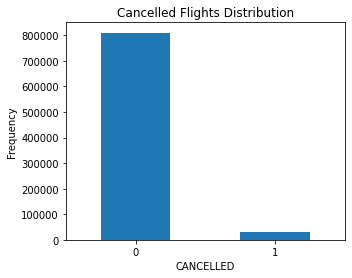

In [26]:
# Let's visualize the distribution of data
count_classes = pd.value_counts(df_train['CANCELLED'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Cancelled Flights Distribution")
plt.xticks(range(2))
plt.xlabel("CANCELLED")
plt.ylabel('Frequency')
plt.show()

In [28]:
# Importing the train-set nd check the shape and total number of missing values

print("The shape of the train-set is:", (df_train.shape))
print("The number of rows in the train-set is:", str(df_train.shape[0]))
print("The number of columns in the train-set is:", str(df_train.shape[1]))

missing_valuestrain = df_train.isnull().sum().sum()
percentMissing = (missing_valuestrain/np.product((df_train.shape)))*100
print("The number of missing values in the train-set is:", str(missing_valuestrain))
print("The percentage of missing values in the train-set is:", str(percentMissing))

The shape of the train-set is: (838858, 14)
The number of rows in the train-set is: 838858
The number of columns in the train-set is: 14
The number of missing values in the train-set is: 5983
The percentage of missing values in the train-set is: 0.05094511143210685


In [29]:
# create dataframe for test test
df_test = pd.read_csv('pred_flights.csv')
df_test.head()

,2015,2,25,3,WN,1046,N731SA,LAS,PHX,700,65,255,905
0,2015,2,25,3,WN,2251,N279WN,LAS,RNO,700,80,345,820
1,2015,2,25,3,WN,857,N277WN,LAS,SMF,700,90,397,830
2,2015,2,25,3,WN,2864,N8632A,LAX,BWI,700,295,2329,1455
3,2015,2,25,3,WN,3220,N8659D,LAX,PHX,700,80,370,920
4,2015,2,25,3,WN,2954,N789SW,LGA,HOU,700,265,1428,1025


In [30]:
# test set dataframe is missing headers information so we will re-initailize it, deleting the target column label
labels = df_train.columns

new_label= labels[:-1]  # select all column labels except the target column

#new_label
df_test = pd.read_csv('pred_flights.csv', header =None, names = new_label)

df_test.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,2015,2,25,3,WN,1046,N731SA,LAS,PHX,700,65,255,905
1,2015,2,25,3,WN,2251,N279WN,LAS,RNO,700,80,345,820
2,2015,2,25,3,WN,857,N277WN,LAS,SMF,700,90,397,830
3,2015,2,25,3,WN,2864,N8632A,LAX,BWI,700,295,2329,1455
4,2015,2,25,3,WN,3220,N8659D,LAX,PHX,700,80,370,920


In [31]:
# Importing the test-set and check the shape and total number of missing values

print("The shape of the test-set is:", (df_test.shape))
print("The number of rows in the test-set is:", str(df_test.shape[0]))
print("The number of columns in the test-set is:", str(df_test.shape[1]))


missing_valuestest = df_test.isnull().sum().sum()
percentMissing = (missing_valuestest/np.product((df_test.shape)))*100
print("The number of missing values in the test-set is:", str(missing_valuestest))
print("The percentage of missing values in the test-set is:", str(percentMissing))

The shape of the test-set is: (209717, 13)
The number of rows in the test-set is: 209717
The number of columns in the test-set is: 13
The number of missing values in the test-set is: 1769
The percentage of missing values in the test-set is: 0.06488597637622275


#### The percentage of missing values in the training-set and test-set is less than 1%. Hence one easy altenative may be to drop na values but we would puruse an alternative strategy.

### Step 2: Feature Engineering (Training and Test Set )

In [32]:
# Examine the data types for train dataframe
df_train.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
SCHEDULED_TIME         float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
CANCELLED                int64
dtype: object

In [33]:
# Check for training set data frame info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838858 entries, 0 to 838857
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 838858 non-null  int64  
 1   MONTH                838858 non-null  int64  
 2   DAY                  838858 non-null  int64  
 3   DAY_OF_WEEK          838858 non-null  int64  
 4   AIRLINE              838858 non-null  object 
 5   FLIGHT_NUMBER        838858 non-null  int64  
 6   TAIL_NUMBER          832877 non-null  object 
 7   ORIGIN_AIRPORT       838858 non-null  object 
 8   DESTINATION_AIRPORT  838858 non-null  object 
 9   SCHEDULED_DEPARTURE  838858 non-null  int64  
 10  SCHEDULED_TIME       838856 non-null  float64
 11  DISTANCE             838858 non-null  int64  
 12  SCHEDULED_ARRIVAL    838858 non-null  int64  
 13  CANCELLED            838858 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 89.6+ MB


In [34]:
# Dealing with missing values in the train-set

df_train.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER            5981
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            2
DISTANCE                  0
SCHEDULED_ARRIVAL         0
CANCELLED                 0
dtype: int64

#### (A) Dealing with Missing Values

In [35]:
# Remove rows with missing target, separate target from predictors
df_full = df_train.copy()
df_full.dropna(axis=0, subset=['CANCELLED'], inplace=True)
#y = X_full.CANCELLED
#X_full.drop(['CANCELLED'], axis=1, inplace=True)

# Show X_full dataframe representing predictors only
df_full.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


## Step 3: Feature Engineering

In [36]:
# cHECK DATA DTYPES
df_full.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
SCHEDULED_TIME         float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
CANCELLED                int64
dtype: object

In [37]:
# cHECK for missing values
df_full.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER            5981
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            2
DISTANCE                  0
SCHEDULED_ARRIVAL         0
CANCELLED                 0
dtype: int64

In [38]:
# Impute missing values in numerical column (SCHEDULED_TIME) with mean

mean_scheduled_time = df_full.SCHEDULED_TIME.mean()
mean_scheduled_time

df_full['SCHEDULED_TIME'].replace(np.nan, mean_scheduled_time,inplace = True)

df_full.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER            5981
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            0
DISTANCE                  0
SCHEDULED_ARRIVAL         0
CANCELLED                 0
dtype: int64

In [39]:
# Fill missing value for categorical column Tail_Number we will drop 
#df_full["TAIL_NUMBER"].mode().iloc[0]

#df_full["TAIL_NUMBER"].fillna(df_full["TAIL_NUMBER"].mode().iloc[0], inplace = True)
df_full.dropna(axis = 0, inplace= True)
df_full.reset_index(drop= True)


df_full.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
CANCELLED              0
dtype: int64

In [40]:
# Examine modified dataframe
df_full.shape

(832877, 14)

In [41]:
df_full.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


# Clean the test set

In [42]:
df_test.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER            1769
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            0
DISTANCE                  0
SCHEDULED_ARRIVAL         0
dtype: int64

In [43]:
# We again drop missing values (complete entry) in test dataframe
df_test.dropna(axis = 0, inplace = True)

df_test.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
dtype: int64

In [44]:
# Save new dataframes as csv file
df_full.to_csv('Clean_train.csv')
df_test.to_csv('Clean_test.csv')